<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module_11_5_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 11.5 – Practice Problems on Decision Trees

This notebook contains a small set of practice exercises based on Module 11:

- Structure and intuition of decision trees  
- Entropy / Gini and splits  
- Pruning and overfitting  
- Evaluation metrics (accuracy, precision, recall, F1)  
- ROC curve, AUC, and threshold interpretation  

Work through the questions in order. You can run the starter code, then **fill in the TODO parts**.

## Problem 1 – Interpreting a Simple Decision Tree (Conceptual)

Consider the following tiny dataset:

| Weather | Windy | Play |
|---------|-------|------|
| Sunny   | No    | Yes  |
| Sunny   | Yes   | Yes  |
| Rainy   | No    | No   |
| Rainy   | Yes   | No   |

1. If we encode `Sunny = 1`, `Rainy = 0`, `Windy: No = 0, Yes = 1`, and train a decision tree on `Weather` and `Windy`, which **single split** do you expect the tree to choose first? Explain in 2–3 sentences.
2. In your own words, explain what **Gini = 0** means for a node of a decision tree.
3. Give a real-life example (outside cricket) where a single yes/no question is enough to make a perfect decision.

## Problem 2 – Build and Visualize a Simple Decision Tree

In this exercise you will:

- Create a tiny synthetic dataset (same as above, but in code)  
- Train a `DecisionTreeClassifier`  
- Visualize the tree and interpret it


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Create the synthetic dataset
data = {
    'Weather': ['Sunny','Rainy','Sunny','Sunny','Rainy','Rainy','Sunny','Rainy'],
    'Windy':   [0,1,0,1,0,1,0,1],
    'Play':    [1,0,1,1,0,0,1,0]
}

df = pd.DataFrame(data)
df

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


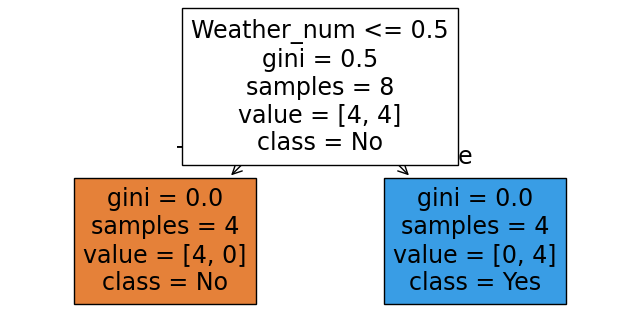

In [6]:
# 2. Encode Weather as a numeric feature
df['Weather_num'] = df['Weather'].map({'Sunny': 1, 'Rainy': 0})

X = df[['Weather_num', 'Windy']]
y = df['Play']

# TODO: create and fit a DecisionTreeClassifier with max_depth=2
model = DecisionTreeClassifier(max_depth=2,random_state=42)
model.fit(X,y)
# 3. Visualize the tree
plt.figure(figsize=(8,4))
plot_tree(model, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()

**Your task:**

1. Run the cells above.  
2. In **2–4 sentences below**, describe how the tree is making the decision. Mention what the root split is and what each leaf predicts.

→ *Write your explanation here.*

## Problem 3 – Decision Tree on a Heart-like Dataset

We will now create a small synthetic dataset that looks a bit like a heart-disease dataset (with `age`, `chol`, `thalach`, and a binary `target`).

Your tasks:

1. Train a decision tree classifier.  
2. Compute **accuracy, precision, recall, and F1-score**.  
3. Change `max_depth` and observe how the metrics change.


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

np.random.seed(42)
n_samples = 300

age = np.random.randint(30, 80, size=n_samples)
chol = np.random.randint(150, 300, size=n_samples)
thalach = np.random.randint(90, 200, size=n_samples)

# Simple synthetic risk score
risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 140)
prob = 1 / (1 + np.exp(-0.05 * risk_score))
target = (prob > np.median(prob)).astype(int)

df_heart = pd.DataFrame({
    'age': age,
    'chol': chol,
    'thalach': thalach,
    'target': target
})

df_heart.head()

,age,chol,thalach,target
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0


Accuracy : 0.8833333333333333
Precision: 0.8571428571428571
Recall   : 0.8888888888888888
F1-score : 0.8727272727272727


<Axes: >

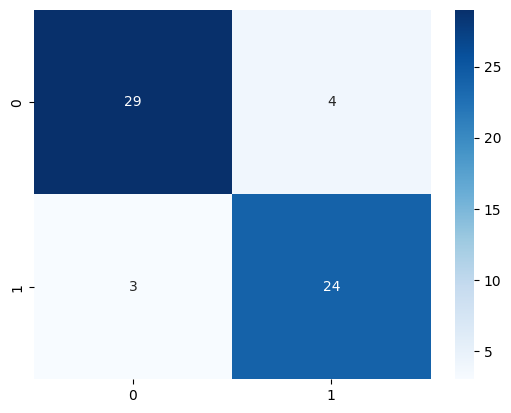

In [8]:
# 1. Train-test split
X = df_heart[['age','chol','thalach']]
y = df_heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# TODO: create a DecisionTreeClassifier with max_depth=4 and fit it and predict
model = DecisionTreeClassifier(max_depth=4,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# 2. Compute metrics
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall   :', recall_score(y_test, y_pred))
print('F1-score :', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

**Your task:**

1. Change `max_depth` to different values (for example: 2, 3, 5, `None`) and re-run the cell.  
2. Observe how accuracy, precision, recall, and F1-score change.  
3. In 3–5 sentences, comment on which `max_depth` seems like a good trade-off between performance and overfitting.

→ *Write your observations here.*

## Problem 4 – ROC Curve, AUC, and Thresholds

In this final exercise you will:

- Use the trained heart-disease tree from Problem 3  
- Plot the ROC curve and compute AUC  
- Try different decision thresholds and see how the confusion matrix changes


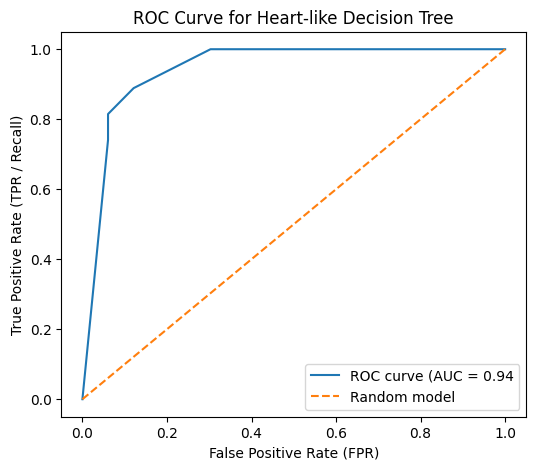

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
tree_clf = model
# 1. Get predicted probabilities for class 1
y_proba = tree_clf.predict_proba(X_test)[:, 1]

# TODO: 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 3. Plot ROC curve

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--', label='Random model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve for Heart-like Decision Tree')
plt.legend()
plt.show()

In [11]:
# 3. Play with different thresholds
import numpy as np

for thr in [0.3, 0.5, 0.7]:
    y_custom = (y_proba >= thr).astype(int)
    cm_thr = confusion_matrix(y_test, y_custom)
    print(f'\nThreshold = {thr}')
    print(cm_thr)
    print('Recall   :', recall_score(y_test, y_custom))
    print('Precision:', precision_score(y_test, y_custom))


Threshold = 0.3
[[29  4]
 [ 3 24]]
Recall   : 0.8888888888888888
Precision: 0.8571428571428571

Threshold = 0.5
[[29  4]
 [ 3 24]]
Recall   : 0.8888888888888888
Precision: 0.8571428571428571

Threshold = 0.7
[[29  4]
 [ 3 24]]
Recall   : 0.8888888888888888
Precision: 0.8571428571428571


**Your task:**

1. Look at how the confusion matrices change as the threshold goes from 0.3 → 0.5 → 0.7.  
2. Which threshold catches the most positive cases (highest recall)?  
3. Which threshold gives the cleanest positive predictions (highest precision)?  
4. If this model were used to screen for a serious heart condition, which threshold would you prefer, and why?

→ *Write your explanation below in 4–6 sentences.*